In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
inspector = inspect(engine)

In [5]:
# Reflect the existing database into a new model
Base = automap_base()

# Use the engine to reflect the database
Base.prepare(engine, reflect=True)

# reflect the tables
inspector.get_table_names()

['measurement', 'station']

In [6]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station


In [8]:
from sqlalchemy.orm import sessionmaker
# Create our session (link) from Python to the DB
Session = sessionmaker(bind=engine)

# Create a session
session = Session()

measurement_columns = inspector.get_columns('measurement')
for column in measurement_columns:
    print(column["name"], column["type"])

station_columns = inspector.get_columns('station')
for column in station_columns:
    print(column["name"], column["type"])



id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
measurement_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
measurement_date

('2017-08-23',)

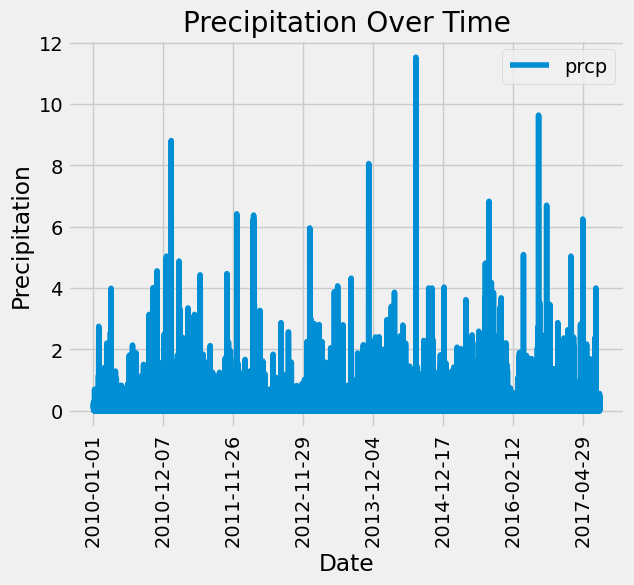

In [10]:
df = pd.read_sql("SELECT * FROM measurement", engine)
df = df.dropna()
df = df.drop_duplicates()

# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
last12months = session.query(measurement).filter(measurement.date >= '2016-08-23').all()
# Calculate the date one year from the last date in data set.
date_one_year = session.query(measurement.date).order_by(measurement.date.desc()).first()

# Perform a query to retrieve the data and precipitation scores
data_and_precipitation = session.query(measurement.date, measurement.prcp).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df_data_and_precipitation = pd.DataFrame(data_and_precipitation, columns=['date', 'precipitation'])

# Sort the dataframe by date
#df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')
#df['date'] = pd.to_datetime(df['date'])
df_data_and_precipitation = df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data
df_data_and_precipitation.plot(x='date', y='prcp', rot=90)
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title('Precipitation Over Time')
plt.show()

In [15]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_data_and_precipitation['prcp'].describe()

count    18103.000000
mean         0.160644
std          0.468746
min          0.000000
25%          0.000000
50%          0.010000
75%          0.110000
max         11.530000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number of stations in the dataset
num_stations = session.query(station.station).count()
num_stations

9

In [20]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [30]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_temps = session.query(
    func.min(measurement.tobs).label('lowest_temp'),
    func.max(measurement.tobs).label('highest_temp'),
    func.avg(measurement.tobs).label('average_temp')
).filter(measurement.station == 'USC00519281').all()
most_active_station_temps

[(54.0, 85.0, 71.66378066378067)]

<Axes: ylabel='Frequency'>

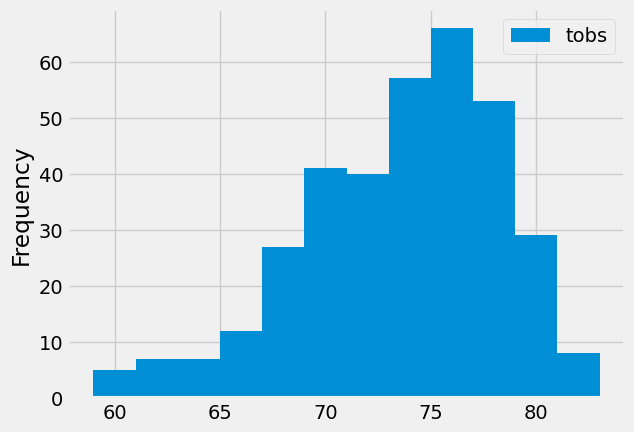

In [34]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
months_temps = session.query(measurement.tobs).filter(measurement.date >= '2016-08-23').\
    filter(measurement.station == 'USC00519281').all()
months_temps_df = pd.DataFrame(months_temps, columns=['tobs'])
months_temps_df.plot.hist(bins=12)

# Close Session

In [35]:
# Close Session
session.close()

,date,precipitation
0,2010-01-01,0.08
1,2010-01-02,0.00
2,2010-01-03,0.00
3,2010-01-04,0.00
4,2010-01-06,NaN
...,...,...
19545,2017-08-19,0.09
19546,2017-08-20,NaN
19547,2017-08-21,0.56
19548,2017-08-22,0.50
